<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2013%EC%9D%BC/12%EC%9B%94_13%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 앙상블을 구현해 보아요!
# Voting을 iris를 가지고 구현해 보아요

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [ ]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

In [ ]:
# 위에서 정제한 데이터를 이용해서 각각의 Model을 만들어요!

# n_neighbors는 짝수 ㄴㄴ, 홀수 단위로 줘야함
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_data_train_norm, t_data_train)
knn_acc = accuracy_score(t_data_test, knn.predict(x_data_test_norm))
print(f'KNN 모델의 accuracy : {knn_acc}')  # 0.97

svm = SVC(kernel='linear', C=0.5)
svm.fit(x_data_train_norm, t_data_train)
svm_acc = accuracy_score(t_data_test, svm.predict(x_data_test_norm))
print(f'SVM 모델의 accuracy : {svm_acc}')  # 0.97

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'DT 모델의 accuracy : {dt_acc}')  # 0.97

KNN 모델의 accuracy : 0.9777777777777777
SVM 모델의 accuracy : 0.9777777777777777
DT 모델의 accuracy : 0.9777777777777777


In [ ]:
# 우리 앙상블 모델을 만들어요!
# hard voting classifier(hvc)
# soft voting은 알아 해보기(probability=True 사용)

hvc = VotingClassifier(estimators=[('KNN',knn),
                                   ('SVM',svm),
                                   ('DT',dt)],
                       voting='hard')  # voting -> hard 또는 soft

hvc.fit(x_data_train_norm, t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy : {hvc_acc}')  # 0.97


앙상블 모델(hard voting)의 accuracy : 0.9777777777777777


In [ ]:
%reset

# 앙상블 bagging을 구현해 보아요!
# Decision Tree를 모아서 만든 Random Forest를 구현해 보아요!

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

dt = DecisionTreeClassifier()
dt.fit(x_data_train_norm, t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'DT 모델의 accuracy : {dt_acc}')  # 0.95

rfc = RandomForestClassifier(n_estimators=50,  # decision tree 50개 의미
                             max_depth=3,  # 트리의 높이 지정(일반적으로 3 설정)
                             random_state=20)
rfc.fit(x_data_train_norm, t_data_train)
rfc_acc = accuracy_score(t_data_test, rfc.predict(x_data_test_norm))
print(f'Random Forest 모델의 accuracy : {rfc_acc}')

DT 모델의 accuracy : 0.9777777777777777
Random Forest 모델의 accuracy : 1.0


In [ ]:
# 앙상블 - boost 방
%reset

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df['target'] = iris.target
# display(df)

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
# x_data는 4개의 feature
x_data = df.drop(['target'],
                 axis=1,
                 inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# model
xgb = XGBClassifier(n_estimators=50,
                    max_depth=3,
                    random_state=20)
xgb.fit(x_data_train_norm, t_data_train)
xgb_acc = accuracy_score(t_data_test, xgb.predict(x_data_test_norm))
print(f'XGB 모델의 accuracy : {xgb_acc}')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
XGB 모델의 accuracy : 0.9555555555555556


In [ ]:
# 최초의 neural network => Perception
# 아주 간단하게 생각하면 logistic regression과 같아요!
# 대신, activation 함수를 logistic은 sigmoid를 사용
# 하지만, Perception은 activaiton 함수로 step function 사용

# 각종 GATE 연산을 학습할 수 있으면,
# 이를 이용해서 AI를 만들 수 있겠다라고 당시에 생각
# 여기서 말하는 GATE연산은 (AND, OR, NOR, XOR, ...)

# 우리도 Perception이 GATE연산을 학습할 수 있는지 확인하기 위해
# logistic regression 사용해서 GATE 학습을 해볼거에요!

# tensorflow로 구현!
# AND, OR, XOR 연산만 구현!

# 필요 module import
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training data set
# AND GATE에 대한 데이터
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype=np.float32)
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

# OR GATE에 대한 데이터
# t_data = np.array([[0],[1],[1],[1]], dtype=np.float32)

# XOR GATE에 대한 데이터
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1,
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')
# [0.00039223884232342243, 1.0] -> AND 연산에 대한 data로 학습
# [0.00036179504240863025, 1.0]  -> OR 연산에 대한 data로 학습
# 정확도는 : [0.6931471824645996, 0.25] -> XOR 연산에 대한 data로 학습


1/1 [==============================] - 0s 118ms/step - loss: 0.6931 - acc: 0.2500
정확도는 : [0.6931471824645996, 0.25]


In [ ]:
# 이번에는 다중 layer perceptron

# tensorflow로 구현!
# AND, OR, XOR 연산만 구현!

# 필요 module import
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training data set
# AND GATE에 대한 데이터
x_data = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]], dtype=np.float32)
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

# OR GATE에 대한 데이터
# t_data = np.array([[0],[1],[1],[1]], dtype=np.float32)

# XOR GATE에 대한 데이터
t_data = np.array([[0],[1],[1],[0]], dtype=np.float32)

model = Sequential()
model.add(Flatten(input_shape=(2,)))  # input layer

# 여러 개의 Hiddent Layer
# Hidden layer는 Dense layer를 사용해요!
model.add(Dense(units=10,
                activation='relu'))
model.add(Dense(units=6,
                activation='relu'))

model.add(Dense(units=1,             # output layer
                activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=30000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')

1/1 [==============================] - 0s 130ms/step - loss: 1.5652e-08 - acc: 1.0000
정확도는 : [1.5651535179017628e-08, 1.0]


In [ ]:
# 기존의 실습에서 사용했던 MNIST 데이터셋을
# 두가지 방식으로 구현해 볼거에요!

# 1. logistic regression을 이용해서 Multinomial classification
# 2. DNN으로 Multinomial classification 구현

%reset
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

# display(df.head()) # 5 rows × 785 columns

# 결측치와 이상치가 없어요!
# Feautre Engineering을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                             # 하지만 keras에게 one-hot처리를 위임할 수
                             # 있어서 따로 처리는 안할꺼예요!
# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))
# [0.5126558542251587, 0.901190459728241]

In [ ]:
import tensorflow as tf
predict = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test,predict))

394/394 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1240
           1       0.97      0.96      0.96      1405
           2       0.89      0.88      0.88      1253
           3       0.88      0.87      0.87      1305
           4       0.90      0.92      0.91      1222
           5       0.86      0.83      0.85      1139
           6       0.93      0.94      0.93      1241
           7       0.92      0.91      0.91      1320
           8       0.82      0.89      0.85      1219
           9       0.88      0.87      0.87      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [ ]:
# MNIST를 Deep Network으로 구현해 보아요!
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

# display(df.head()) # 5 rows × 785 columns

# 결측치와 이상치가 없어요!
# Feautre Engineering을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                             # 하지만 keras에게 one-hot처리를 위임할 수
                             # 있어서 따로 처리는 안할꺼예요!
# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()
# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))
[0.8045268058776855, 0.9674603343009949]

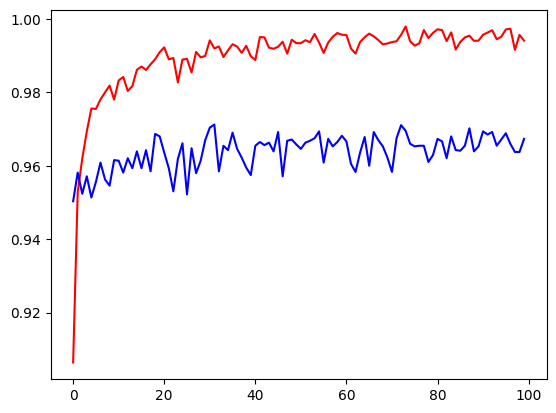

In [ ]:
# 우리 model이 잘 만들어진 모델인지 확인!!!
# 그래프를 이용해서 확인해보는게 좋아요!
# 학습할때 학습데이터로 loss, acc를 구하고
#          validation data로 val_loss, val_acc를 구하게 되는데
# 이 둘간의 그래프를 비교해보면 overfitting의 정도를 확인!

import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')

plt.show()

In [ ]:
# MNIST를 Deep Network으로 구현해 보아요!
# Tensorflow Keras가 제공하는 여러 기능이 있는
# 그 중 필수적으로 사용하는 기능들이 있어요!
# 대표적인게 Early Stopping(조기종료) 기능!

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')

# display(df.head()) # 5 rows × 785 columns

# 결측치와 이상치가 없어요!
# Feautre Engineering을 할게 없어요!

# 독립변수(feature), 종속변수(target) 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values  # 원래 one-hot 처리를 해야 해요!
                             # 하지만 keras에게 one-hot처리를 위임할 수
                             # 있어서 따로 처리는 안할꺼예요!
# 정규화는 진행해야 해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Early Stopping Callback 설정
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 조기 종료의 기준
# patience : loss값이 증가하는 것을 몇번 참을 것인가에 대한 숫자
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)


# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[es_cb],
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))
[0.15706495940685272, 0.9557142853736877]

Epoch 1/100
236/236 [==============================] - 3s 9ms/step - loss: 0.3224 - acc: 0.8998 - val_loss: 0.1548 - val_acc: 0.9527
Epoch 2/100
236/236 [==============================] - 2s 8ms/step - loss: 0.1438 - acc: 0.9565 - val_loss: 0.1561 - val_acc: 0.9520
Epoch 3/100
236/236 [==============================] - 2s 8ms/step - loss: 0.1278 - acc: 0.9609 - val_loss: 0.1401 - val_acc: 0.9556
Epoch 4/100
236/236 [==============================] - 2s 8ms/step - loss: 0.1014 - acc: 0.9691 - val_loss: 0.1633 - val_acc: 0.9536
Epoch 5/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0905 - acc: 0.9733 - val_loss: 0.1528 - val_acc: 0.9633
Epoch 6/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0861 - acc: 0.9744 - val_loss: 0.1565 - val_acc: 0.9582
Epoch 7/100
236/236 [==============================] - 3s 11ms/step - loss: 0.0738 - acc: 0.9791 - val_loss: 0.2190 - val_acc: 0.9543
Epoch 8/100
394/394 [==============================] - 1s 2ms/step